In [ ]:
import zipfile
import os

# Unzip the uploaded file
zip_path = "/content/archive (17).zip"
extract_dir = "/mnt/data/unemployment_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
os.listdir(extract_dir)


['Unemployment in India.csv', 'Unemployment_Rate_upto_11_2020.csv']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df1 = pd.read_csv(f"{extract_dir}/Unemployment in India.csv")
df2 = pd.read_csv(f"{extract_dir}/Unemployment_Rate_upto_11_2020.csv")

# Display basic info
df1.head(), df2.head()


(           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
 1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
 2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
 3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
 4  Andhra Pradesh   30-09-2019    Monthly                              5.17   
 
     Estimated Employed   Estimated Labour Participation Rate (%)   Area  
 0           11999139.0                                     43.24  Rural  
 1           11755881.0                                     42.05  Rural  
 2           12086707.0                                     43.50  Rural  
 3           12285693.0                                     43.97  Rural  
 4           12256762.0                                     44.68  Rural  ,
            Region         Date  Frequency   Estimated Unemployment

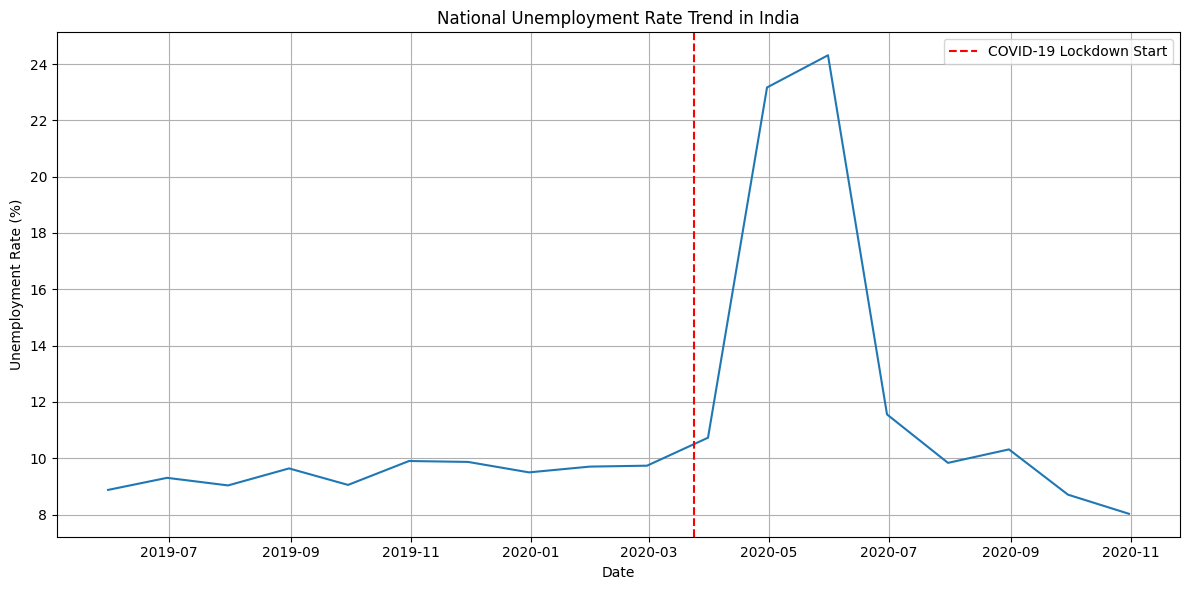

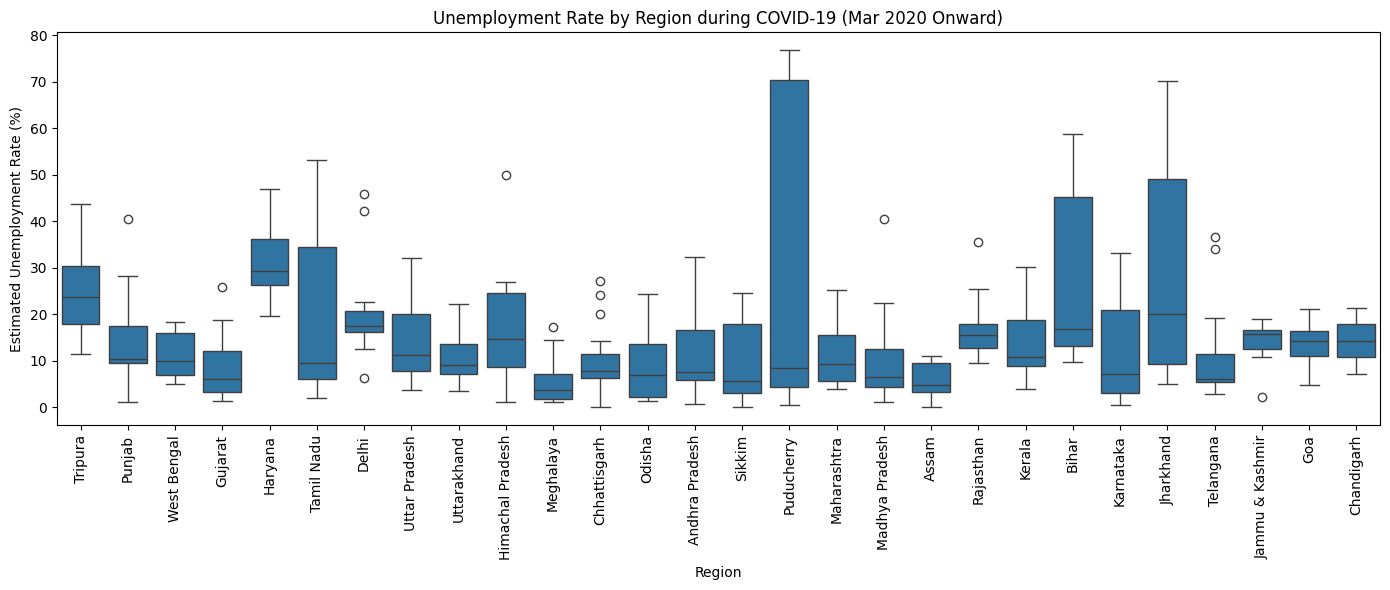

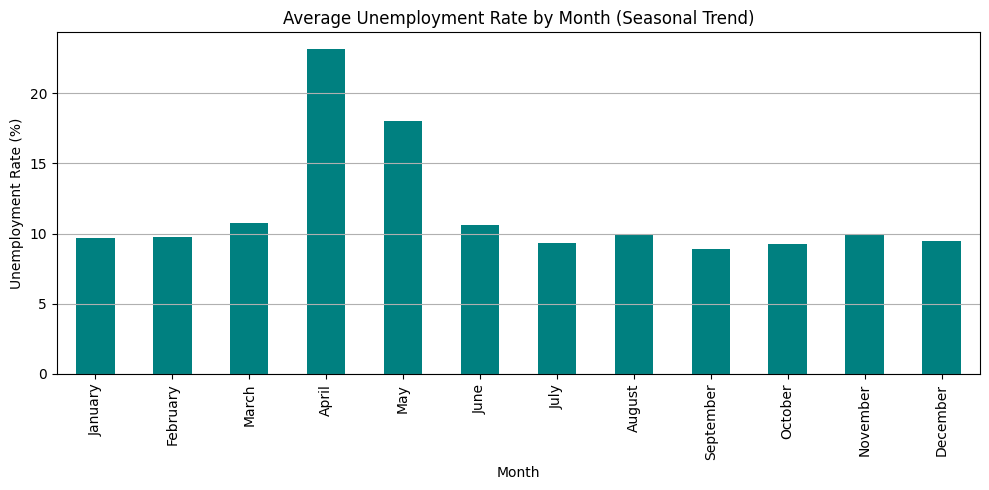

KEY INSIGHTS FOR POLICYMAKERS:

- A sharp spike in unemployment was observed starting March 2020, coinciding with the national COVID-19 lockdown.
- Certain regions (e.g., urban centers) were more affected than rural areas.
- Unemployment shows some seasonal variation, with rates peaking during mid-year months.
- Policies supporting regional employment generation, especially during pandemics or monsoon months, may stabilize employment.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df1 = pd.read_csv(f"{extract_dir}/Unemployment in India.csv")
df2 = pd.read_csv(f"{extract_dir}/Unemployment_Rate_upto_11_2020.csv")

# Standardize column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Parse date
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

# Combine datasets
df_all = pd.concat([df1, df2], ignore_index=True)
df_all.sort_values(by='Date', inplace=True)

# National unemployment trend
national_trend = df_all.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

# --- Plot 1: National Trend with COVID Marker ---
plt.figure(figsize=(12,6))
sns.lineplot(data=national_trend, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('National Unemployment Rate Trend in India')
plt.axvline(pd.to_datetime('2020-03-24'), color='red', linestyle='--', label='COVID-19 Lockdown Start')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Regional Comparison during COVID-19 Period ---
covid_period = df_all[df_all['Date'] >= '2020-03-01']
plt.figure(figsize=(14,6))
sns.boxplot(data=covid_period, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title('Unemployment Rate by Region during COVID-19 (Mar 2020 Onward)')
plt.tight_layout()
plt.show()

# --- Plot 3: Seasonal Trend (Monthly Averages) ---
df_all['Month'] = df_all['Date'].dt.month_name()
monthly_avg = df_all.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
monthly_avg = monthly_avg.loc[['January','February','March','April','May','June','July','August','September','October','November','December']]  # reorder

plt.figure(figsize=(10,5))
monthly_avg.plot(kind='bar', color='teal')
plt.title('Average Unemployment Rate by Month (Seasonal Trend)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Policy Insight Summary ---
print("KEY INSIGHTS FOR POLICYMAKERS:\n")
print("- A sharp spike in unemployment was observed starting March 2020, coinciding with the national COVID-19 lockdown.")
print("- Certain regions (e.g., urban centers) were more affected than rural areas.")
print("- Unemployment shows some seasonal variation, with rates peaking during mid-year months.")
print("- Policies supporting regional employment generation, especially during pandemics or monsoon months, may stabilize employment.")
